# Bilder zusammenfügen
In diesem Notebook zeigen wir, wie Bilder zusammengefügt werden können. Das Zusammenfügen ist häufig notwendig, wenn Bilder in [überlappenden] Kacheln aufgenommen werden. Das Kombinieren dieser Kacheln vertikal oder horizontal wird als Stitching bezeichnet.

In [1]:
from skimage.io import imread
import stackview
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import numpy as np

Nach der Aufnahme der Bilder wissen Sie normalerweise, wie stark sich die Bilder überlappen. Hier gehen wir davon aus, dass die Überlappung als Anzahl von Pixeln angegeben ist. Wenn Sie nur den Prozentsatz der Überlappung kennen, müssen Sie diese Zahl berechnen, indem Sie den Prozentsatz mit der Bildgröße (Breite oder Höhe) multiplizieren.

In [2]:
num_overlap_pixels = 40

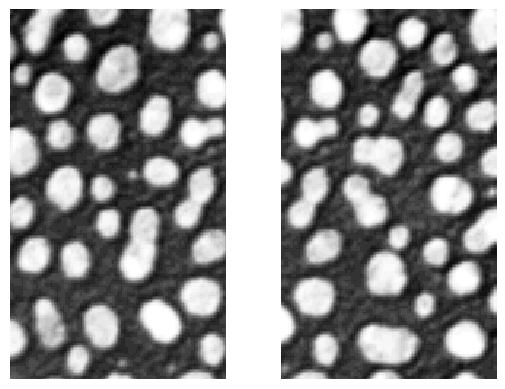

In [3]:
image1 = imread("../../data/blobs_stitching1_overlap40.tif")
image2 = imread("../../data/blobs_stitching2_overlap40.tif")
fig, ax = plt.subplots(1, 2)
stackview.imshow(image1, plot=ax[0])
stackview.imshow(image2, plot=ax[1])

Beachten Sie, dass diese Bilder einige überlappende Pixel enthalten. Wenn wir die Bilder einfach nebeneinander zusammensetzen, sehen wir diese Pixel doppelt.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
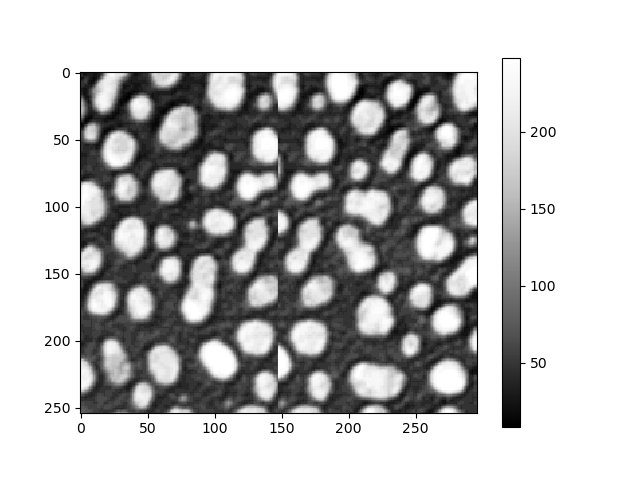
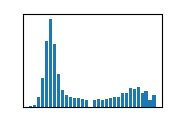

In [4]:
cle.combine_horizontally(image1, image2)

Pyclesperanto ermöglicht das Zusammenfügen der Bilder mit Überlappung. Der überlappende Bereich wird linear gemischt.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
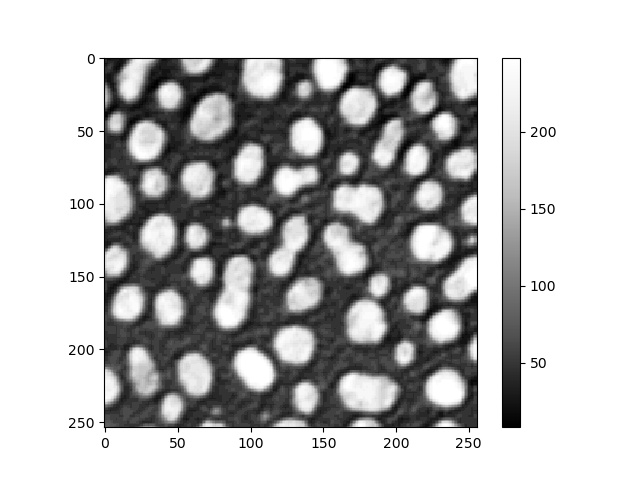
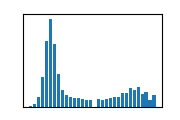

In [5]:
cle.stitch_horizontally_linear_blending(image1, image2, num_pixels_overlap=num_overlap_pixels)

Um zu demonstrieren, wie die lineare Mischung funktioniert, erstellen wir zwei synthetische Bilder. Zuerst kombinieren wir sie wie oben gezeigt.

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
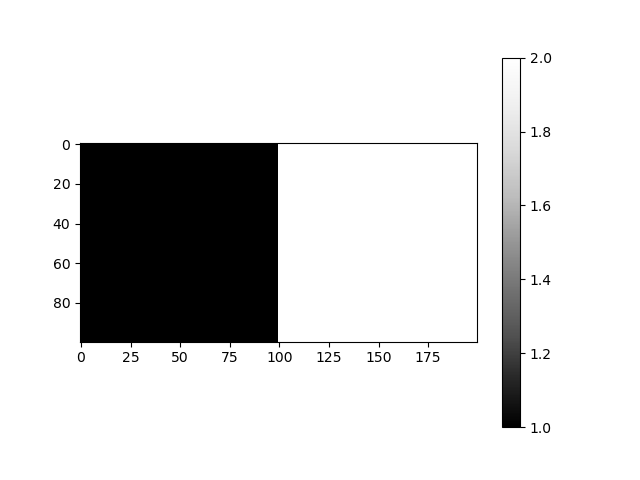
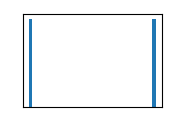

In [6]:
syn_image1 = np.ones((100, 100))
syn_image2 = np.ones((100, 100)) * 2

cle.combine_horizontally(syn_image1, syn_image2)

Dann fügen wir die Bilder mit linearer Mischung zusammen.

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
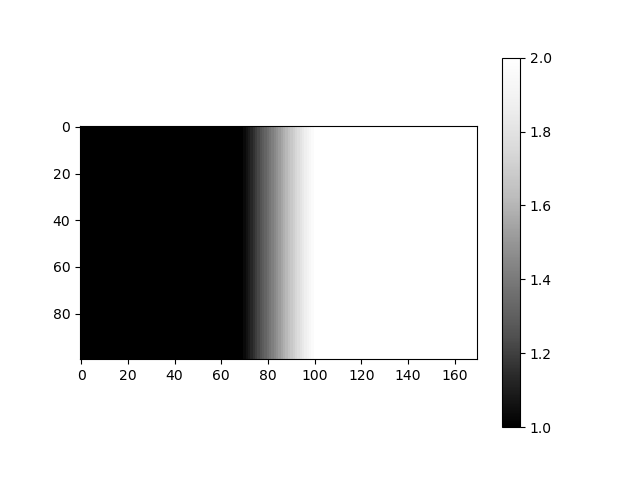
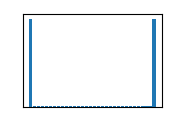

In [7]:
cle.stitch_horizontally_linear_blending(syn_image1, syn_image2, num_pixels_overlap=30)

Hinweis: Die Berechnung der Registrierungsparameter für die optimale Überlappung der Bilder wird derzeit in pyclesperanto nicht unterstützt.